In [1]:
# Code source: Brian McFee
# License: ISC

##################
# Standard imports
from __future__ import print_function
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
import matplotlib
import librosa
from IPython.display import Audio
import librosa.display
import sys
import scipy
from dtw import dtw
%matplotlib inline
try:
    sys.getwindowsversion()
except AttributeError:
    isWindows = False
else:
    isWindows = True

if isWindows:
    import win32api,win32process,win32con
    pid = win32api.GetCurrentProcessId()
    handle = win32api.OpenProcess(win32con.PROCESS_ALL_ACCESS, True, pid)
    win32process.SetPriorityClass(handle, win32process.HIGH_PRIORITY_CLASS)

In [2]:
#conda install av -c conda-forge
ypI, srpI = librosa.load('Audio/Are you That Somebody (Phonicmind in.mp3')
ypA, srpA = librosa.load('Audio/Are you That Somebody (Phonicmind ac.mp3')

# And compute the spectrogram magnitude and phase
S_pI, phasepI = librosa.magphase(librosa.stft(ypI))
S_pA, phasepA = librosa.magphase(librosa.stft(ypA))

In [3]:
idxpI = slice(*librosa.time_to_frames([148, 182], sr=srpI)) #slice it
idxpA = slice(*librosa.time_to_frames([148, 182], sr=srpA)) #slice it

In [4]:
yI, srI = librosa.load('Audio/Are You That Somebody (Instrumental).mp3')
yA, srA = librosa.load('Audio/Are You That Somebody (Acapella).mp3')

S_I, phaseI = librosa.magphase(librosa.stft(yI))
S_A, phaseA = librosa.magphase(librosa.stft(yA))

In [5]:
#alignment with separate audio files
idxI = slice(*librosa.time_to_frames([147.6, 181.6], sr=srI)) #actual instrumental is a bit ahead, check sample viz
idxA = slice(*librosa.time_to_frames([148.2, 182.2], sr=srA)) #actual acapella is a bit behind, check sample viz

In [6]:
Audio(data=librosa.istft((S_pI * phasepI)[:, idxpI]), rate=srpI)

In [7]:
librosa.output.write_wav('Audio/Aaliyah_Phonic_Sample_Instrumental.wav', y=librosa.istft((S_pI * phasepI)[:, idxpI]), sr=srpI)

In [8]:
Audio(data=librosa.istft((S_pA * phasepA)[:, idxpA]), rate=srpA)

In [9]:
librosa.output.write_wav('Audio/Aaliyah_Phonic_Sample_Vocals.wav', y=librosa.istft((S_pA * phasepA)[:, idxpA]), sr=srpA)

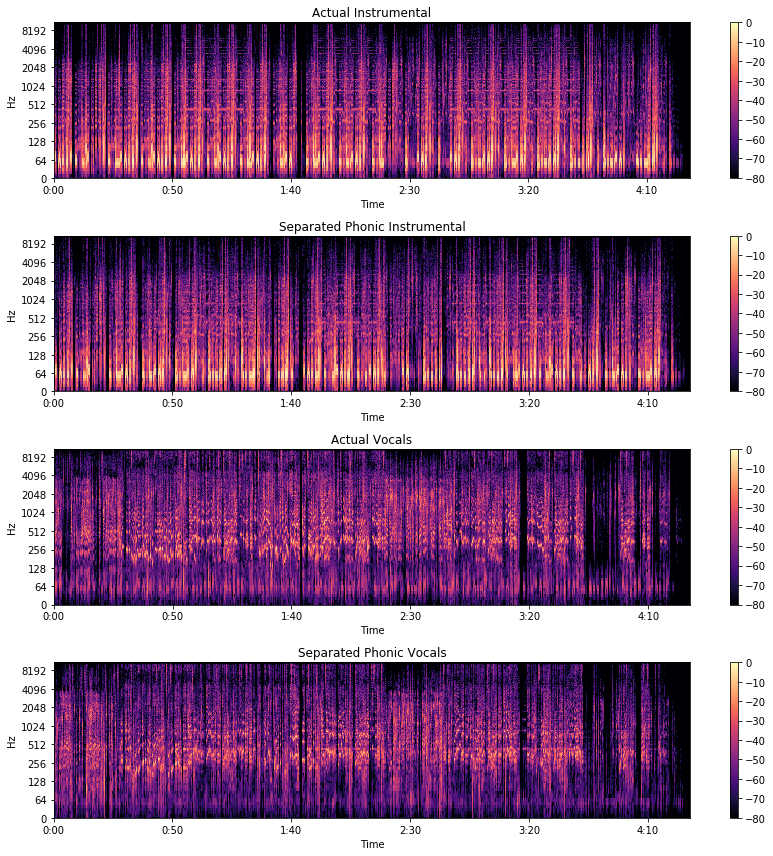

In [10]:
plt.figure(figsize=(12, 12))
plt.subplot(4, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(S_I, ref=np.max),
                         y_axis='log', x_axis='time', sr=srI)
plt.title('Actual Instrumental')
plt.colorbar()
plt.subplot(4, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(S_pI, ref=np.max),
                         y_axis='log', x_axis='time', sr=srpA)
plt.title('Separated Phonic Instrumental')
plt.colorbar()
plt.subplot(4, 1, 3)
librosa.display.specshow(librosa.amplitude_to_db(S_A, ref=np.max),
                         y_axis='log', x_axis='time', sr=srA)
plt.title('Actual Vocals')
plt.colorbar()
plt.subplot(4, 1, 4)
librosa.display.specshow(librosa.amplitude_to_db(S_pA, ref=np.max),
                         y_axis='log', x_axis='time', sr=srpI)
plt.title('Separated Phonic Vocals')
plt.colorbar()
plt.tight_layout()
plt.show()

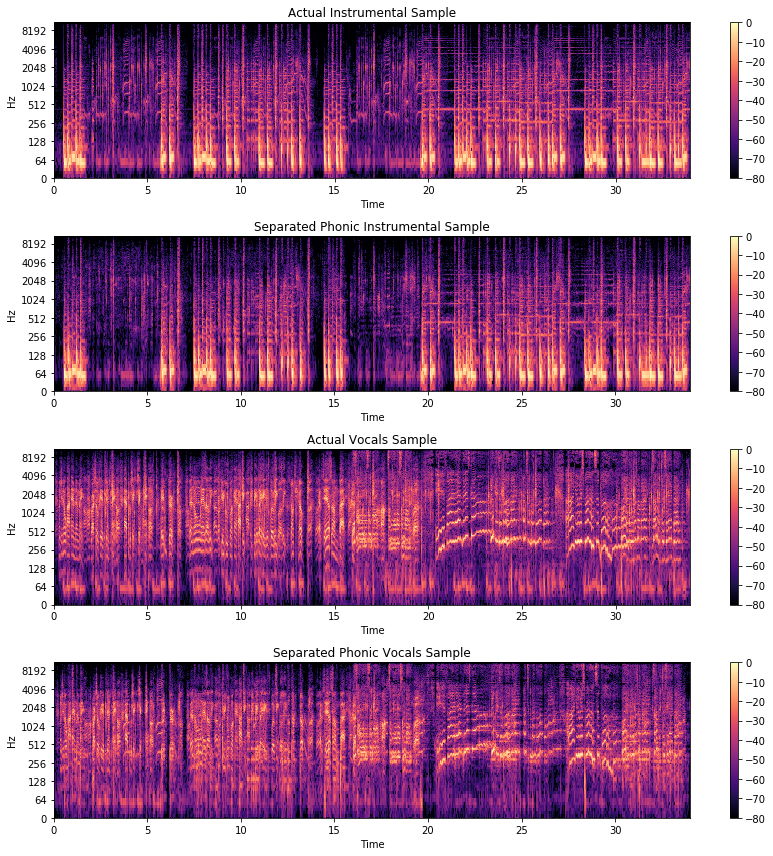

In [11]:
plt.figure(figsize=(12, 12))
plt.subplot(4, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(S_I[:, idxI], ref=np.max),
                         y_axis='log', x_axis='time', sr=srI) #aligned from earlier
plt.title('Actual Instrumental Sample')
plt.colorbar()
plt.subplot(4, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(S_pI[:, idxpI], ref=np.max),
                         y_axis='log', x_axis='time', sr=srpI)
plt.title('Separated Phonic Instrumental Sample')
plt.colorbar()
plt.subplot(4, 1, 3)
librosa.display.specshow(librosa.amplitude_to_db(S_A[:, idxA], ref=np.max),
                         y_axis='log', x_axis='time', sr=srA) #aligned from earlier
plt.title('Actual Vocals Sample')
plt.colorbar()
plt.subplot(4, 1, 4)
librosa.display.specshow(librosa.amplitude_to_db(S_pA[:, idxpA], ref=np.max),
                         y_axis='log', x_axis='time', sr=srpA)
plt.title('Separated Phonic Vocals Sample')
plt.colorbar()
plt.tight_layout()
plt.show()

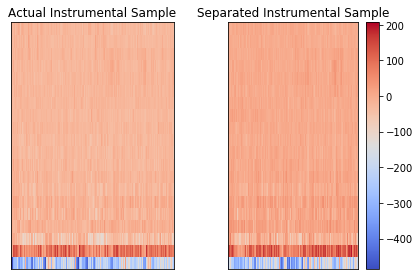

In [12]:
#Showing multiple plots using subplot
plt.subplot(1, 2, 1) 
mfccI = librosa.feature.mfcc(librosa.istft((S_I * phaseI)[:, idxI]), srI)   #Computing MFCC values
librosa.display.specshow(mfccI)
plt.title('Actual Instrumental Sample')
plt.subplot(1, 2, 2)
mfcc_I = librosa.feature.mfcc(librosa.istft((S_pI * phasepI)[:, idxpI]), srpI)
librosa.display.specshow(mfcc_I)
plt.title('Separated Instrumental Sample')
plt.colorbar()
plt.tight_layout()
plt.show()

In [13]:
distI, costI, accI, pathI = dtw(mfccI.T, mfcc_I.T, dist=lambda x, y: norm(x - y, ord=1))
print("The normalized distance between instrumentals: ",distI)   # 0 for similar audios 

The normalized distance between instrumentals:  100.59909952827658


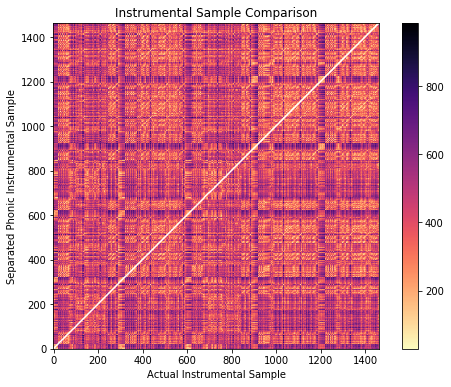

In [14]:
plt.figure(figsize=(8, 6))
plt.imshow(costI.T, origin='lower', cmap=plt.get_cmap('magma_r'), interpolation='nearest')
plt.plot(pathI[0], pathI[1], 'w')   #creating plot for DTW, note the 45 angle from previous alignment
plt.title('Instrumental Sample Comparison')
plt.xlabel("Actual Instrumental Sample")
plt.ylabel("Separated Phonic Instrumental Sample")
plt.colorbar()
plt.show()

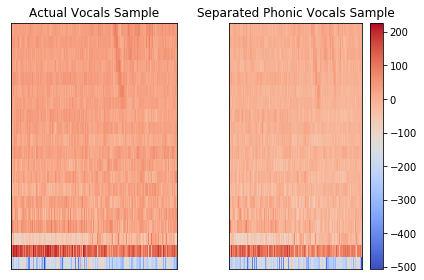

In [15]:
#Showing multiple plots using subplot
plt.subplot(1, 2, 1) 
mfccA = librosa.feature.mfcc(librosa.istft((S_A * phaseA)[:, idxA]), srA)   #Computing MFCC values
librosa.display.specshow(mfccA)
plt.title('Actual Vocals Sample')
plt.subplot(1, 2, 2)
mfcc_A = librosa.feature.mfcc(librosa.istft((S_pA * phasepA)[:, idxpA]), srpA)
librosa.display.specshow(mfcc_A)
plt.title('Separated Phonic Vocals Sample')
plt.colorbar()
plt.tight_layout()
plt.show()

In [16]:
distA, costA, accA, pathA = dtw(mfccA.T, mfcc_A.T, dist=lambda x, y: norm(x - y, ord=1))
print("The normalized distance between acapellas: ",distA)   # 0 for similar audios 

The normalized distance between acapellas:  111.60022769673436


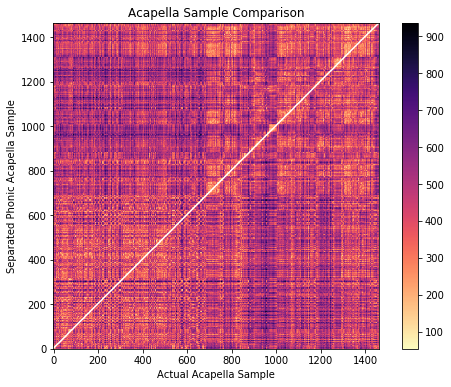

In [17]:
plt.figure(figsize=(8, 6))
plt.imshow(costA.T, origin='lower', cmap=plt.get_cmap('magma_r'), interpolation='nearest')
plt.plot(pathA[0], pathA[1], 'w')   #creating plot for DTW, note the 45 angle from previous alignment
plt.title('Acapella Sample Comparison')
plt.xlabel("Actual Acapella Sample")
plt.ylabel("Separated Phonic Acapella Sample")
plt.colorbar()
plt.show()

In [18]:
n_fft = 4410
hop_size = 2205

x_I_chroma = librosa.feature.chroma_stft(y=librosa.istft((S_I * phaseI)[:, idxI]), sr=srI,
                                         tuning=0, norm=2,hop_length=hop_size, n_fft=n_fft)
x_instrumental_chroma = librosa.feature.chroma_stft(y=librosa.istft((S_pI * phasepI)[:, idxpI]), sr=srpI,
                                         tuning=0, norm=2,hop_length=hop_size, n_fft=n_fft)
DI, wpI = librosa.core.dtw(X=x_I_chroma, Y=x_instrumental_chroma, metric='euclidean')

x_A_chroma = librosa.feature.chroma_stft(y=librosa.istft((S_A * phaseA)[:, idxA]), sr=srA,
                                         tuning=0, norm=2,hop_length=hop_size, n_fft=n_fft)
x_acapella_chroma = librosa.feature.chroma_stft(y=librosa.istft((S_pA * phasepA)[:, idxpA]), sr=srpA,
                                         tuning=0, norm=2,hop_length=hop_size, n_fft=n_fft)
DA, wpA = librosa.core.dtw(X=x_A_chroma, Y=x_acapella_chroma, metric='euclidean')

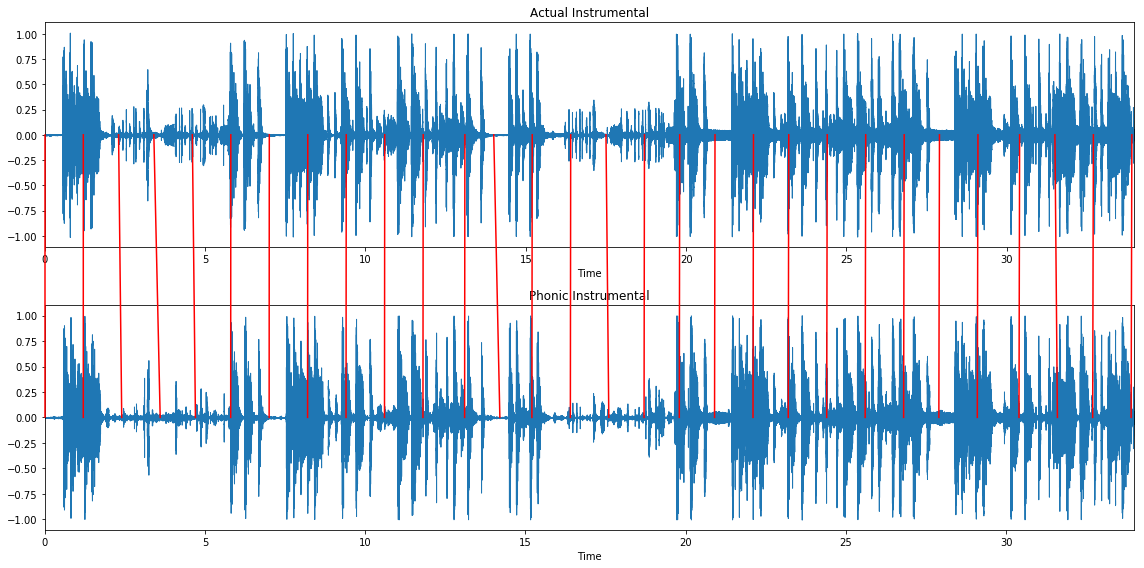

In [19]:
fig = plt.figure(figsize=(16, 8))

# Plot x_1
plt.subplot(2, 1, 1)
librosa.display.waveplot(y=librosa.istft((S_I * phaseI)[:, idxI]), sr=srI)
plt.title('Actual Instrumental')
ax1 = plt.gca()

# Plot x_2
plt.subplot(2, 1, 2)
librosa.display.waveplot(y=librosa.istft((S_pI * phasepI)[:, idxpI]), sr=srpI)
plt.title('Phonic Instrumental')
ax2 = plt.gca()

plt.tight_layout()

trans_figure = fig.transFigure.inverted()
lines = []
arrows = 30
points_idxI = np.int16(np.round(np.linspace(0, wpI.shape[0] - 1, arrows)))

# for tp1, tp2 in zip((wp[points_idx, 0]) * hop_size, (wp[points_idx, 1]) * hop_size):
for tpI1, tpI2 in wpI[points_idxI] * hop_size / srI:
    # get position on axis for a given index-pair
    coord1 = trans_figure.transform(ax1.transData.transform([tpI1, 0]))
    coord2 = trans_figure.transform(ax2.transData.transform([tpI2, 0]))

    # draw a line
    line = matplotlib.lines.Line2D((coord1[0], coord2[0]),
                                   (coord1[1], coord2[1]),
                                   transform=fig.transFigure,
                                   color='r')
    lines.append(line)

fig.lines = lines
plt.tight_layout()
plt.show()

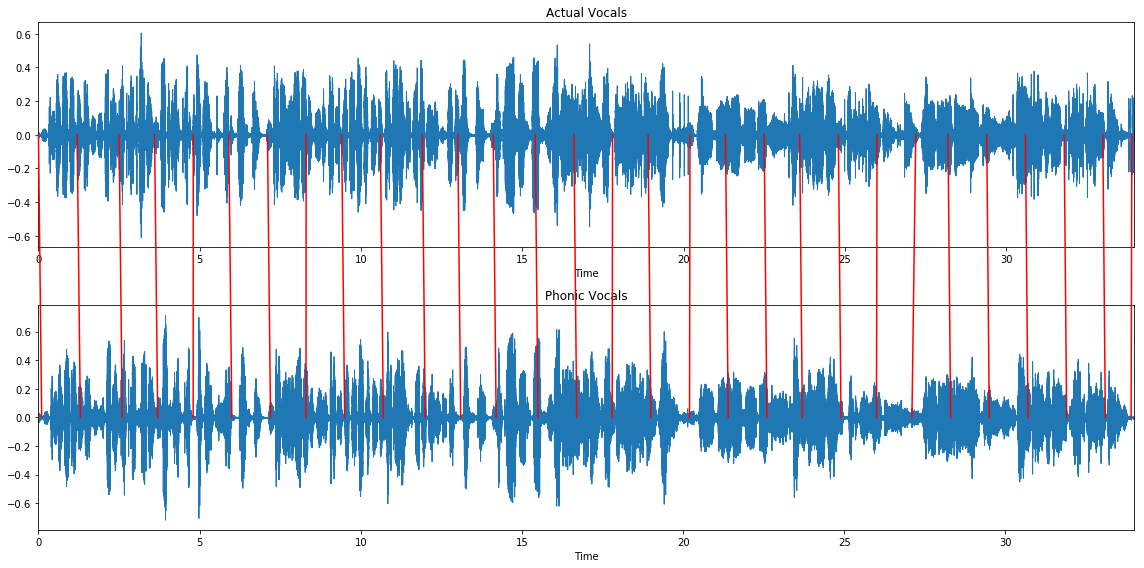

In [20]:
fig = plt.figure(figsize=(16, 8))

# Plot x_1
plt.subplot(2, 1, 1)
librosa.display.waveplot(y=librosa.istft((S_A * phaseA)[:, idxA]), sr=srA)
plt.title('Actual Vocals')
ax1 = plt.gca()

# Plot x_2
plt.subplot(2, 1, 2)
librosa.display.waveplot(y=librosa.istft((S_pA * phasepA)[:, idxpA]), sr=srpA)
plt.title('Phonic Vocals')
ax2 = plt.gca()

plt.tight_layout()

trans_figure = fig.transFigure.inverted()
lines = []
arrows = 30
points_idxA = np.int16(np.round(np.linspace(0, wpA.shape[0] - 1, arrows)))

# for tp1, tp2 in zip((wp[points_idx, 0]) * hop_size, (wp[points_idx, 1]) * hop_size):
for tpA1, tpA2 in wpA[points_idxA] * hop_size / srA:
    # get position on axis for a given index-pair
    coord1 = trans_figure.transform(ax1.transData.transform([tpA1, 0]))
    coord2 = trans_figure.transform(ax2.transData.transform([tpA2, 0]))

    # draw a line
    line = matplotlib.lines.Line2D((coord1[0], coord2[0]),
                                   (coord1[1], coord2[1]),
                                   transform=fig.transFigure,
                                   color='r')
    lines.append(line)

fig.lines = lines
plt.tight_layout()
plt.show()